# Dades, probabilitats i estadístiques

**Exercici 1**

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

**Exercici 2**

Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

**Exercici 3**

Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

**Exercici 4**

Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

In [1]:
import numpy as np

import pandas as pd
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
import seaborn as sn

import statistics as stat
from collections import Counter
import scipy.stats

from functools import reduce

**Usaremos un datase con datos del videojuego Fifa, con datos sobre jugadores de fútbol, para completar los siguientes ejercicios. Este DataSet cuenta con 17588 registros. El DataSet usado forma parte de la asignatura Estadística avanzada del Master de Ciencia de Datos de la UOC.**

In [2]:
# Cargamos el dataset
df_fifa = pd.read_csv("fifa_clean.csv", encoding = "ISO-8859-1")

In [3]:
# Muestra del dataset
display(df_fifa.head(10))

,ID,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,1,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185,78,Right,02/05/1985,31,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,2,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,179,72,Left,06/24/1987,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,3,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174,68,Right,02/05/1992,24,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,4,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182,85,Right,01/24/1987,29,ST,High / Medium,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
4,5,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193,85,Right,03/27/1986,30,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89
5,6,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,186,82,Right,11/07/1990,26,GK,Medium / Medium,3,1,31,13,13,13,21,38,88,12,30,68,60,17,31,32,56,56,25,64,43,57,67,21,31,13,12,21,19,40,13,86,88,87,85,90
6,7,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,185,78,Right,08/21/1988,28,ST,High / Medium,4,3,87,85,25,19,42,80,88,89,39,78,87,62,83,65,79,82,79,84,79,78,84,85,86,91,82,77,76,81,86,8,15,12,6,10
7,8,Gareth Bale,Wales,RS,11.0,Real Madrid,RW,11.0,09/02/2013,2022.0,90,183,74,Left,07/16/1989,27,RW,High / Medium,3,4,88,89,51,52,55,65,87,86,59,79,85,87,86,80,93,95,78,80,65,77,85,86,91,87,90,86,85,76,76,5,15,11,15,6
8,9,Zlatan Ibrahimovic,Sweden,NaN,NaN,Manchester Utd,ST,9.0,07/01/2016,2017.0,90,196,95,Right,10/03/1981,35,ST,Medium / Low,4,4,90,87,15,27,41,84,85,86,20,83,91,76,84,76,69,74,75,93,41,86,72,80,93,90,88,82,82,91,93,9,13,10,15,12
9,10,Thibaut Courtois,Belgium,GK,1.0,Chelsea,GK,13.0,07/26/2011,2019.0,89,199,91,Left,05/11/1992,24,GK,Medium / Medium,3,1,23,13,11,16,18,23,81,13,15,44,52,14,32,31,46,52,38,70,45,61,68,13,36,14,17,19,11,27,12,86,84,69,91,89


In [4]:
# Estructura del Dataset
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  17588 non-null  int64  
 1   Name                17588 non-null  object 
 2   Nationality         17588 non-null  object 
 3   National_Position   1075 non-null   object 
 4   National_Kit        1075 non-null   float64
 5   Club                17588 non-null  object 
 6   Club_Position       17587 non-null  object 
 7   Club_Kit            17587 non-null  float64
 8   Club_Joining        17587 non-null  object 
 9   Contract_Expiry     17587 non-null  float64
 10  Rating              17588 non-null  int64  
 11  Height              17588 non-null  int64  
 12  Weight              17588 non-null  int64  
 13  Preffered_Foot      17588 non-null  object 
 14  Birth_Date          17588 non-null  object 
 15  Age                 17588 non-null  int64  
 16  Pref

### Exercici 1

In [5]:
# Escogemos el atributo Rating
Rating = list(df_fifa.Rating)

In [6]:
# Cálculo a mano (sin numpy)
n = len(Rating)

# Moda
c = Counter(Rating)
moda = [key for key, value in c.items() if value == c.most_common(1)[0][1]]

# Mediana
median = sorted(Rating)[n // 2] if n % 2 else sum(sorted(Rating)[n//2 - 1: n//2 + 1]) / 2

# Media
mean = sum(Rating) / n

# Desviación estandar
std = ( sum( [(x - mean)**2 for x in Rating] ) / n ) ** .5

print(
    """
    Moda: {}
    Mediana: {}
    Desviación estandar: {}
    Media aritmética: {}
    """
    .format(moda, median, std, mean)
)


    Moda: [67]
    Mediana: 66.0
    Desviación estandar: 7.082810548725998
    Media aritmética: 66.16619285876735
    


In [7]:
# Cálculo con funciones de Python
mode = stat.mode(Rating)
median = stat.median(Rating)
std = stat.stdev(Rating)
mean = stat.mean(Rating)

print(
    """
    Moda: {}
    Mediana: {}
    Desviación estandard: {}
    Media aritmética: {}
    """
    .format(mode, median, std, mean)
)


    Moda: 67
    Mediana: 66.0
    Desviación estandard: 7.083011910808365
    Media aritmética: 66.16619285876735
    


### Exercici 2

In [8]:
# Escogemos los atributos Weight and Height
Weight = df_fifa.Weight
Height = df_fifa.Height

In [9]:
# Cálculo a mano
def Pearson(X,Y):
    
    if len(X) != len(Y):
        raise TypeError("X and Y must have the same size!")
        return
    
    N = len(X)
    
    rCoefficient = (N * sum(X*Y) - sum(X)*sum(Y)) / (np.sqrt( N * sum(X**2) - sum(X)**2 ) * np.sqrt( N * sum(Y**2) - sum(Y)**2 ))
    return rCoefficient

Corr_coef = Pearson(Weight, Height)
print("Coeficiente de correlación de Pearson: {}".format(Corr_coef))

Coeficiente de correlación de Pearson: 0.7582203578762092


In [10]:
# Cálculo con scipy
Corr_coef = scipy.stats.pearsonr(Weight, Height)[0]
print("Coeficiente de correlación de Pearson: {}".format(Corr_coef))

Coeficiente de correlación de Pearson: 0.7582203578762092


### Exercici 3

<AxesSubplot:>

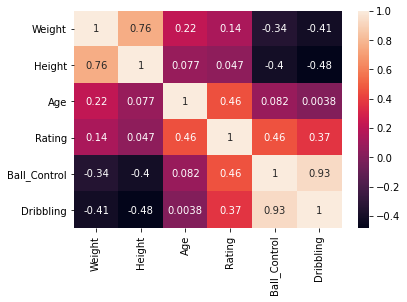

In [11]:
# Escogemos unos cuantos atributos
columnas = ["Name", "Nationality", "Club", "Weight", "Height",
            "Age", "Rating", "Ball_Control", "Dribbling"]
df_corr = df_fifa[columnas]

# Ploteamos la Matriz con seaborn
corrMatrix = df_corr.corr()
sn.heatmap(corrMatrix, annot=True)

### Exercici 4

In [12]:
# Escogemos el atributo Rating
Rating = np.array(df_fifa.Rating)

In [13]:
# Cálculo a mano 
n = len(Rating)

# Harmonic Mean
mean_har = n / sum(1 / Rating)

# Geometric Mean
# mean_geo = np.prod(Rating) ** (1/n) # Prod too large

Rating_log = np.log(Rating)
mean_geo = np.exp(np.mean(Rating_log))

print(
    """
    Harmonic Mean: {}
    Geometric Mean: {}
    """
    .format(mean_har, mean_geo)
)


    Harmonic Mean: 65.38897466233367
    Geometric Mean: 65.78114076338744
    


In [14]:
# Cálculo con funciones de Python
mean_har = stat.harmonic_mean(Rating)
mean_geo = stat.geometric_mean(Rating)

print(
    """
    Harmonic Mean: {}
    Geometric Mean: {}
    """
    .format(mean_har, mean_geo)
)


    Harmonic Mean: 65.38897466233757
    Geometric Mean: 65.78114076338738
    
